In [1]:
import numpy as np
from matplotlib import pyplot as plt, patches, cm
import networkx as nx

# Cech and Rips complexes

In [2]:
points = np.concatenate([[0.09*np.array([np.cos(i), np.sin(i)]) for i in np.pi/3*np.arange(6)], 
                         [0.16*np.array([np.cos(-np.pi/2), np.sin(-np.pi/2)])], 
                         [0.12*np.array([np.cos(i), np.sin(i)]) + np.array([0.15, 0.09]) for i in (np.pi/3)*np.arange(3) - np.pi/6], 
                         [0.25*np.array([1, -1])]])

points

array([[ 9.00000000e-02,  0.00000000e+00],
       [ 4.50000000e-02,  7.79422863e-02],
       [-4.50000000e-02,  7.79422863e-02],
       [-9.00000000e-02,  1.10218212e-17],
       [-4.50000000e-02, -7.79422863e-02],
       [ 4.50000000e-02, -7.79422863e-02],
       [ 9.79717439e-18, -1.60000000e-01],
       [ 2.53923048e-01,  3.00000000e-02],
       [ 2.53923048e-01,  1.50000000e-01],
       [ 1.50000000e-01,  2.10000000e-01],
       [ 2.50000000e-01, -2.50000000e-01]])

In [3]:
r = 0.1

In [19]:
xmin, ymin = points.min(axis=0) 
xmax, ymax = points.max(axis=0)
dist = max(xmax - xmin, ymax - xmin) + 2*r
xmid = 0.5*(xmin + xmax)
ymid = 0.5*(ymin + ymax)
xmin, xmax = xmid + 0.5*dist*np.array([-1, 1])
ymin, ymax = ymid + 0.5*dist*np.array([-1, 1])

/tmp/ipykernel_148629/133577591.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


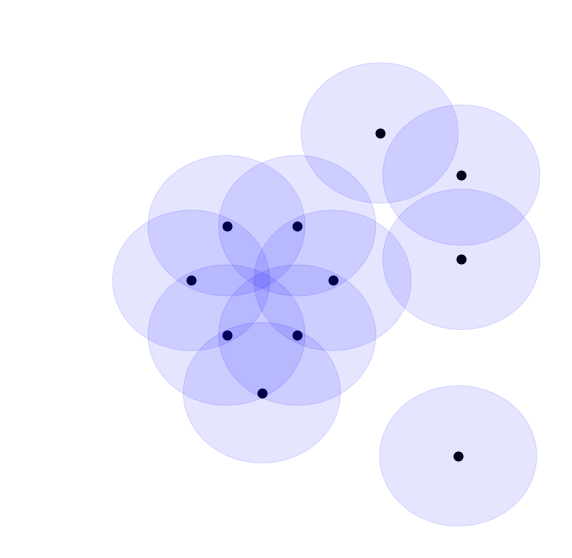

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=4)
for point in points:
    circle = patches.Circle(point, radius=r, color='blue', alpha=0.1)
    ax.add_patch(circle)
    
plt.scatter([xmin, ymin], [xmax, ymax], alpha=0)
fig.show()

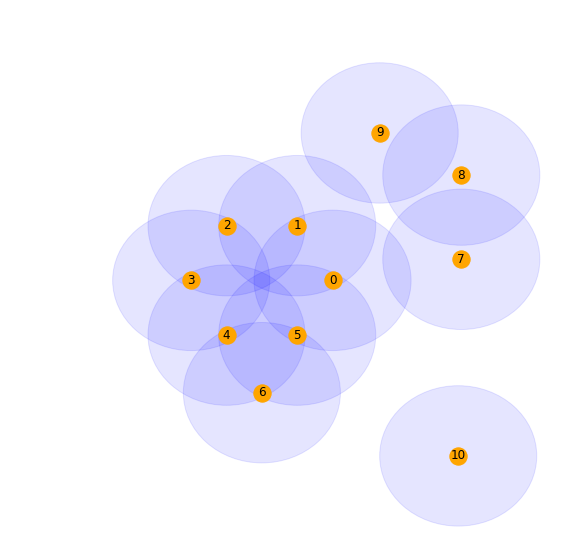

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black')
for point in points:
    circle = patches.Circle(point, radius=r, color='blue', alpha=0.1)
    ax.add_patch(circle)
graph = nx.Graph()
graph.add_nodes_from(np.arange(len(points)))
nx.draw_networkx(graph, pos=points, node_color='orange')
plt.scatter([xmin, ymin], [xmax, ymax], alpha=0)

In [24]:
edges = np.concatenate([[(i, (i+1)%6) for i in range(6)], 
                        [(i, (i+2)%6) for i in range(6)], 
                        [(4, 6), (5, 6)], 
                        [(0, 7), (7, 8), (8, 9), (9, 1)]])

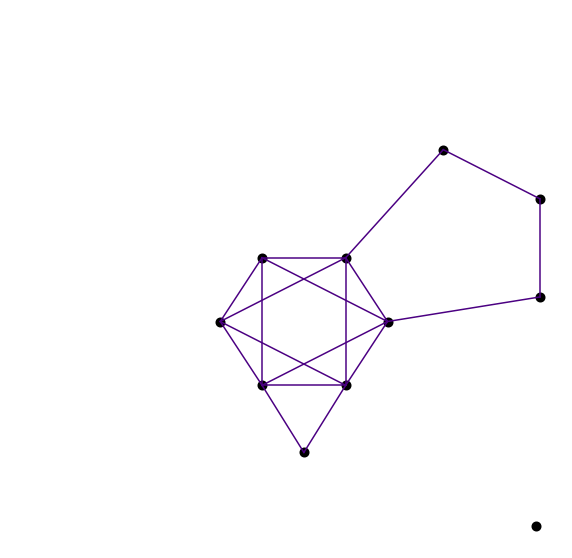

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=4)
for edge in edges:
    plt.plot(points[:,0][edge], points[:,1][edge], color='indigo')

plt.scatter([xmin, ymin], [xmax, ymax], alpha=0)
plt.show()